<a href="https://colab.research.google.com/github/shyamsparrow/Jan-G4---NLP-Chatbot/blob/main/Capstone_NLP_Chatbot_Jan_A_G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - NLP Chatbot

### DOMAIN: 
Industrial safety. NLP based Chatbot.

### CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

### Columns description:
* Data: timestamp or time/date information
* Countries: which country the accident occurred (anonymised)
* Local: the city where the manufacturing plant is located (anonymised)
* Industry sector: which sector the plant belongs to
* Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
* Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have   been (due to other factors involved in the accident)
* Gender: if the person is male of female
* Employee or Third Party: if the injured person is an employee or a third party
* Critical Risk: some description of the risk involved in the accident
* Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

### PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

# Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

#import config
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Model Building

## Machine Learning Models

In [2]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,plot_confusion_matrix


## ANN Models

In [3]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, LSTM,  Embedding, Dropout, Bidirectional, GlobalMaxPool1D, BatchNormalization

#from keras.utils import np_utils
#from keras.layers.merge import Concatenate
#from keras.utils import plot_model


from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten

## CNN+LSTM Model

In [5]:
industry_df = pd.read_csv("industry_df_with_stopwords.csv")

In [6]:
industry_df_1 = pd.DataFrame(industry_df[['Year','Month','Day','Weekday','WeekofYear','Season','Country','Local','Potential_Accident_Level','Description_preprocessed']])

In [7]:
industry_df_1.head()

,Year,Month,Day,Weekday,WeekofYear,Season,Country,Local,Potential_Accident_Level,Description_preprocessed
0,2016,1,1,Friday,53,Summer,Country_01,Local_01,IV,while removing the drill rod of the jumbo 08 f...
1,2016,1,2,Saturday,53,Summer,Country_02,Local_02,IV,during the activation of a sodium sulphide pum...
2,2016,1,6,Wednesday,1,Summer,Country_01,Local_03,III,in the substation milo located at level 170 wh...
3,2016,1,8,Friday,1,Summer,Country_01,Local_04,I,being approximately in the no 1880 cx695 ob th...
4,2016,1,10,Sunday,1,Summer,Country_01,Local_04,IV,approximately at in circumstance that the mech...


**Preprocessing for categorical features**

In [8]:
# Create categorical inputs DataFrame
cat_featenc_df = pd.DataFrame()

# Label encoding
industry_df_1['Season'] = industry_df_1['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
cat_featenc_df['Season'] = LabelEncoder().fit_transform(industry_df_1['Season']).astype(np.int8)

industry_df_1['Weekday'] = industry_df_1['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
cat_featenc_df['Weekday'] = LabelEncoder().fit_transform(industry_df_1['Weekday']).astype(np.int8)

#cat_featenc_df['Accident_Level'] = LabelEncoder().fit_transform(industry_df_1['Accident_Level']).astype(np.int8)
cat_featenc_df['Potential_Accident_Level'] = LabelEncoder().fit_transform(industry_df_1['Potential_Accident_Level']).astype(np.int8)

In [9]:
#Creating dummy variables for categoricalinputs
Dummy_frame = pd.get_dummies(industry_df_1[['Country','Local']], columns=['Country','Local'],prefix=['',''],prefix_sep=['',''], drop_first=True)

# Merge the above dataframe with the original dataframe cat_featenc_df
cat_featenc_df = cat_featenc_df.join(Dummy_frame.reset_index(drop=True))

cat_featenc_df = industry_df_1[['Year','Month','Day','WeekofYear','Description_preprocessed']].reset_index(drop=True).join(cat_featenc_df.reset_index(drop=True))

cat_featenc_df.head(3)

,Year,Month,Day,WeekofYear,Description_preprocessed,Season,Weekday,Potential_Accident_Level,Country_02,Country_03,...,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12
0,2016,1,1,53,while removing the drill rod of the jumbo 08 f...,0,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,2,53,during the activation of a sodium sulphide pum...,0,5,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,6,1,in the substation milo located at level 170 wh...,0,2,2,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
# Select input and output features
X = cat_featenc_df.drop('Potential_Accident_Level', axis = 1)
y = cat_featenc_df['Potential_Accident_Level']

In [11]:
# Divide our data into testing and training sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1,stratify=y)#, stratify = y_cat

print('X_train shape : ({0})'.format(X_train.shape[0]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0})'.format(X_test.shape[0]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

# Convert both the training and test labels into one-hot encoded vectors:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train shape : (328)
y_train shape : (328,)
X_test shape : (83)
y_test shape : (83,)


In [12]:
X_train.head()

,Year,Month,Day,WeekofYear,Description_preprocessed,Season,Weekday,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12
216,2016,9,21,38,employee wa preparing rice using a utensil typ...,3,2,1,0,0,0,0,1,0,0,0,0,0,0,0
258,2016,12,8,49,at time when four employee lowered a metal she...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
155,2016,6,24,25,during the change of rim position 1 of the jum...,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0
311,2017,2,8,6,during the preparation for the office cleaning...,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0
262,2016,12,13,50,during the activity of vegetation of the slope...,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0


Dividing the train and test data to categorical and text data

In [13]:
X_cat_train=X_train.drop('Description_preprocessed', axis = 1)
X_cat_test=X_test.drop('Description_preprocessed', axis = 1)
X_text_train=X_train['Description_preprocessed']
X_text_test=X_test['Description_preprocessed']

Standard scaling of categorical variables

In [14]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres

### Text data Processing

We can take the Preprocessed description (texts) as our features and the Potential accident level as our Targets for LSTM Model.

We need to tokenise our data to convert the text data into numbers.

In [15]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [16]:
industry_df['nb_words'] = industry_df['Description_preprocessed'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(industry_df['nb_words'].min()))
print('Maximum number of words: {}'.format(industry_df['nb_words'].max()))

Minimum number of words: 16
Maximum number of words: 183


The maximum number of words in our data including stopwords  is 183. Based on this we can fix our maximum length of our data will be 185.

In [17]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 185

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2865


The Vocabulary size of the data is 2865. (Total number of words in our data).

Glove 6B To 200D Embedding took from this source http://nlp.stanford.edu/data/glove.6B.zip, it saved in drive and convert it into dictionary file

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

In [18]:
print('Indexing word vectors.')

embeddings_dictionary = {}
f = open('glove.6B.200d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_dictionary))

Indexing word vectors.
Found 400000 word vectors.


In [19]:
embedding_size = 200

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(2865, 200)

The Created embedding matrix is of shape 2865 * 200

In [20]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal = self.validation_data
        val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

## Hybrid Model (CNN with categorical data+LSTM Model with text data)

In [21]:
#This is lstm model for text data
input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

In [22]:
#Reshaping the train and test categorical data to give to Conv1D layer

X_cat_train_reshaped = np.array(X_cat_train).reshape(X_cat_train.shape[0],X_cat_train.shape[1],1)
X_cat_test_reshaped = np.array(X_cat_test).reshape(X_cat_test.shape[0],X_cat_test.shape[1],1)

In [23]:
#This is Convolutional Neural network to process categorical variables
param = 1e-4

input_2 = Input(shape=((X_cat_train_reshaped.shape[1],X_cat_train_reshaped.shape[2])))

embedding_layer_1 = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(None,56,1))(input_2)

embedding_layer_2 = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(embedding_layer_1)

drop_out_layer_6  = Dropout(0.5)(embedding_layer_2)
embedding_layer_3 = MaxPooling1D(pool_size=2)(drop_out_layer_6)

batch_norm_layer_1  = Flatten()(embedding_layer_3)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
hybrid_model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
opt = optimizers.Adamax(lr=0.01)
#opt = SGD(lr=0.001, momentum=0.9)
hybrid_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [24]:
print(hybrid_model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 185)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 185, 200)     573000      input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 185, 256)     336896      embedding[0][0]                  
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 256)          0           bidirectional[0][0]              
_______________________________________________________________________________________

In [140]:
plot_model(hybrid_model, to_file='hybrid_model.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [25]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

#target_type = 'multi_label'
#, target_type
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_train))

# fit the keras model on the dataset
training_history = hybrid_model.fit([X_text_train, X_cat_train], y_train, epochs=30, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_test), callbacks=[rlrp, metrics])

Epoch 1/30
41/41 [==============================] - 13s 325ms/step - loss: 1.6940 - acc: 0.2317 - val_loss: 1.4928 - val_acc: 0.3373
Epoch 2/30
41/41 [==============================] - 10s 244ms/step - loss: 1.5005 - acc: 0.2622 - val_loss: 1.4766 - val_acc: 0.3373
Epoch 3/30
41/41 [==============================] - 8s 204ms/step - loss: 1.5697 - acc: 0.3079 - val_loss: 1.4695 - val_acc: 0.3373
Epoch 4/30
41/41 [==============================] - 8s 195ms/step - loss: 1.5182 - acc: 0.2835 - val_loss: 1.4721 - val_acc: 0.3373
Epoch 5/30
41/41 [==============================] - 8s 193ms/step - loss: 1.5096 - acc: 0.3079 - val_loss: 1.4648 - val_acc: 0.3373
Epoch 6/30
41/41 [==============================] - 8s 188ms/step - loss: 1.4918 - acc: 0.3262 - val_loss: 1.4647 - val_acc: 0.3373
Epoch 7/30
41/41 [==============================] - 8s 189ms/step - loss: 1.4691 - acc: 0.3232 - val_loss: 1.4577 - val_acc: 0.3373
Epoch 8/30
41/41 [==============================] - 8s 190ms/step - loss: 

In [26]:
# evaluate the keras model
_, train_accuracy = hybrid_model.evaluate([X_text_train, X_cat_train], y_train, batch_size=8, verbose=0)
_, test_accuracy = hybrid_model.evaluate([X_text_test, X_cat_test], y_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 39.63
Test accuracy: 36.14


In [27]:
cnn_lstm_model_json = hybrid_model.to_json()
with open("CNN_LSTM_model.json", "w") as json_file:
    json_file.write(cnn_lstm_model_json)
    
# serialize weights to HDF5
hybrid_model.save_weights("CNN_LSTM_model_weights.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
hybrid_model.save("finalized_CNN_LSTM_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


Text(0.5, 1.0, 'Training and validation loss')

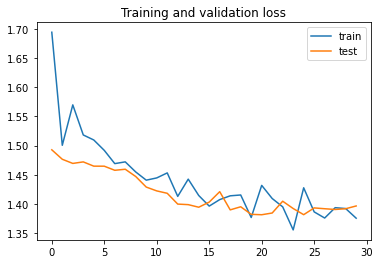

In [28]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

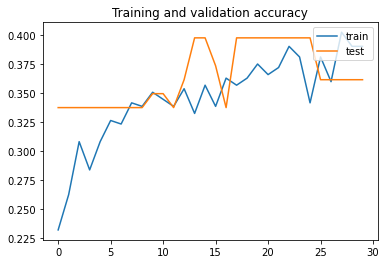

In [29]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

Train accuracy is fluctuating around 35 value. Test accuracy is fluctuating between 35 to 40

In [30]:
#hd_model = load_model(r"/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/Models/HYBRID_model.h5")
#hybrid_model = load_model(r"C:\Users\200488052\Downloads\ML\GL\Capstone\Jan-G4---NLP-Chatbot-main\finalized_Hybrid_model.h5")

y_pred = hybrid_model.predict([X_text_test, X_cat_test], verbose=0) # Multiclass
y_pred_index = np.argmax(y_pred,axis=1)
y_original = np.argmax(y_test, axis =1)

In [31]:
_,tr_accuracy = hybrid_model.evaluate([X_text_train, X_cat_train],y_train) 
_,te_accuracy = hybrid_model.evaluate([X_text_test, X_cat_test],y_test) 

F1_sre= f1_score(y_original,y_pred_index, average='micro')
tr_accuracy,te_accuracy,F1_sre

3/3 [==============================] - 0s 76ms/step - loss: 1.3967 - acc: 0.3614


(0.396341472864151, 0.3614457845687866, 0.3614457831325302)

In [ ]:
result_df.loc[len(result_df.index)] = ['HYBRID_Model', tr_accuracy, te_accuracy,F1_sre] 
result_df

In [ ]:
with open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/result_df.csv', "wb") as f:
  pickle.dump((result_df), f)

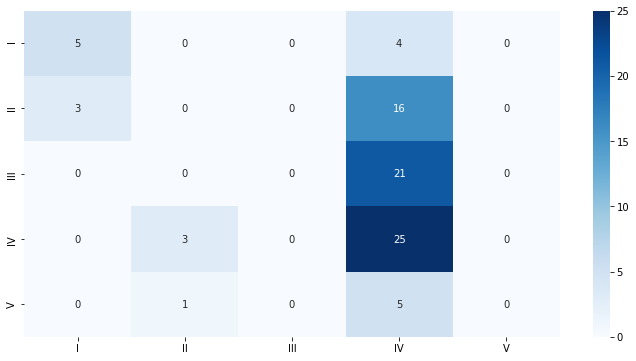

In [32]:
cm = confusion_matrix(y_original,y_pred_index)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label);

In [33]:
print(classification_report(y_original, y_pred_index))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        21
           3       0.35      0.89      0.51        28
           4       0.00      0.00      0.00         6

    accuracy                           0.36        83
   macro avg       0.20      0.29      0.22        83
weighted avg       0.19      0.36      0.23        83



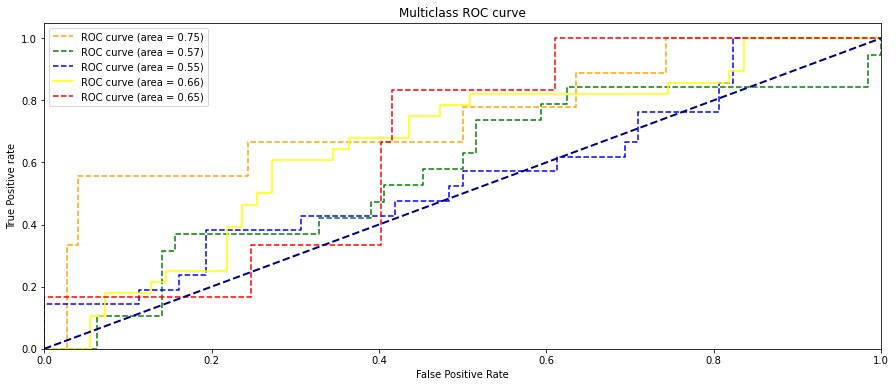

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
#thresh ={}
roc_auc = dict()

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i],_ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plotting  
plt.figure(figsize=(15, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label="ROC curve (area = %0.2f)" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label="ROC curve (area = %0.2f)" % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='-',color='yellow', label= "ROC curve (area = %0.2f)" % roc_auc[3])
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label="ROC curve (area = %0.2f)" % roc_auc[4])

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

### With Augmented data

In [35]:
Text_aug = pd.read_csv("industry_augmentation.csv")

In [36]:
Text_aug.head()

,Description,Potential_Accident_Level
0,While removing the drill rod of the Jumbo 08 f...,IV
1,During the activation of a sodium sulphide pum...,IV
2,In the sub-station MILPO located at level +170...,III
3,Being 9:45 am. approximately in the Nv. 1880 C...,I
4,Approximately at 11:45 a.m. in circumstances t...,IV


In [37]:
X_text_aug=Text_aug['Description']

y_text_aug = LabelEncoder().fit_transform(Text_aug['Potential_Accident_Level']).astype(np.int8)

In [38]:
# Divide our data into testing and training sets:
X_text_train_aug, X_text_test_aug, y_text_train_aug, y_text_test_aug = train_test_split(X_text_aug, y_text_aug, test_size = 0.20, random_state = 1,stratify=y_text_aug)#, stratify = y_cat

print('X_train shape : ({0})'.format(X_text_train_aug.shape[0]))
print('y_train shape : ({0},)'.format(y_text_train_aug.shape[0]))
print('X_test shape : ({0})'.format(X_text_test_aug.shape[0]))
print('y_test shape : ({0},)'.format(y_text_test_aug.shape[0]))

# Convert both the training and test labels into one-hot encoded vectors:
y_train = to_categorical(y_text_train_aug)
y_test = to_categorical(y_text_test_aug)

X_train shape : (657)
y_train shape : (657,)
X_test shape : (165)
y_test shape : (165,)


In [39]:
X_text_train_aug.head()

526    in moments that the truck for transport of per...
477    during the refurbishment work of the upper pip...
649    in circumstances that the mechanical technicia...
257    At times when four mechanics performed the rem...
233    In phase I, the operator carried out the remov...
Name: Description, dtype: object

We need to tokenise our data to convert the text data into numbers.

In [40]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_text_train_aug)

X_text_train_aug = tokenizer.texts_to_sequences(X_text_train_aug)
X_text_test_aug = tokenizer.texts_to_sequences(X_text_test_aug)

In [41]:
Text_aug['nb_words'] = Text_aug['Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(Text_aug['nb_words'].min()))
print('Maximum number of words: {}'.format(Text_aug['nb_words'].max()))

Minimum number of words: 16
Maximum number of words: 192


The maximum number of words in our data including stopwords  is 192. Based on this we can fix our maximum length of our data will be 195.

In [42]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 195

X_text_train_aug = pad_sequences(X_text_train_aug, padding='post', maxlen=maxlen)
X_text_test_aug = pad_sequences(X_text_test_aug, padding='post', maxlen=maxlen)

vocab_size: 3959


The Vocabulary size of the data is 3959. (Total number of words in our data).

Glove 6B To 200D Embedding took from this source http://nlp.stanford.edu/data/glove.6B.zip, it saved in drive and convert it into dictionary file

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

In [43]:
print('Indexing word vectors.')

embeddings_dictionary = {}
f = open('glove.6B.200d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_dictionary))

Indexing word vectors.
Found 400000 word vectors.


We Pickled the Glove Embedding dictionary file for future use.

In [44]:
embedding_size = 200

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(3959, 200)

In [45]:
Cat_data=cat_featenc_df.drop(['Description_preprocessed','Potential_Accident_Level'], axis = 1)

In [46]:
X_cat_aug=pd.concat([Cat_data,Cat_data],axis=0).reset_index(drop=True)

In [47]:
# Divide our data into testing and training sets:
X_cat_train_aug, X_cat_test_aug, y_cat_train_aug, y_cat_test_aug = train_test_split(X_cat_aug, y_text_aug, test_size = 0.20, random_state = 1,stratify=y_text_aug)#, stratify = y_cat

print('X_train shape : ({0})'.format(X_cat_train_aug.shape[0]))
print('y_train shape : ({0},)'.format(y_cat_train_aug.shape[0]))
print('X_test shape : ({0})'.format(X_cat_test_aug.shape[0]))
print('y_test shape : ({0},)'.format(y_cat_test_aug.shape[0]))

# Convert both the training and test labels into one-hot encoded vectors:
y_train = to_categorical(y_cat_train_aug)
y_test = to_categorical(y_cat_test_aug)

X_train shape : (657)
y_train shape : (657,)
X_test shape : (165)
y_test shape : (165,)


In [48]:
#This is lstm model for text data
input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

In [49]:
#Reshaping the train and test categorical data to give to Conv1D layer

X_cat_train_reshaped = np.array(X_cat_train_aug).reshape(X_cat_train_aug.shape[0],X_cat_train_aug.shape[1],1)
X_cat_test_reshaped = np.array(X_cat_test_aug).reshape(X_cat_test_aug.shape[0],X_cat_test_aug.shape[1],1)

In [50]:
#This is Convolutional Neural network to process categorical variables
param = 1e-4

input_2 = Input(shape=((X_cat_train_reshaped.shape[1],X_cat_train_reshaped.shape[2])))

embedding_layer_1 = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(None,56,1))(input_2)

embedding_layer_2 = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(embedding_layer_1)

drop_out_layer_6  = Dropout(0.5)(embedding_layer_2)
embedding_layer_3 = MaxPooling1D(pool_size=2)(drop_out_layer_6)

batch_norm_layer_1  = Flatten()(embedding_layer_3)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
hybrid_model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
opt = optimizers.Adamax(lr=0.01)
#opt = SGD(lr=0.001, momentum=0.9)
hybrid_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [51]:
print(hybrid_model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 195)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 195, 200)     791800      input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 195, 256)     336896      embedding_1[0][0]                
__________________________________________________________________________________________________
global_max_pooling1d_1 (GlobalM (None, 256)          0           bidirectional_1[0][0]            
_______________________________________________________________________________________

In [52]:
print(X_text_train_aug.shape)
print(X_cat_train_aug.shape)
print(y_train.shape)
print(y_test.shape)

(657, 195)
(657, 19)
(657, 5)
(165, 5)


In [53]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

#target_type = 'multi_label'
#, target_type
metrics = Metrics(validation_data=([X_text_train_aug, X_cat_train_aug], y_train))

# fit the keras model on the dataset
training_history = hybrid_model.fit([X_text_train_aug, X_cat_train_aug], y_train, epochs=30, batch_size=8, verbose=1, validation_data=([X_text_test_aug, X_cat_test_aug], y_test), callbacks=[rlrp, metrics])

Epoch 1/30
83/83 [==============================] - 23s 282ms/step - loss: 1.6177 - acc: 0.2740 - val_loss: 1.5370 - val_acc: 0.3333
Epoch 2/30
83/83 [==============================] - 20s 244ms/step - loss: 1.5241 - acc: 0.3090 - val_loss: 1.5087 - val_acc: 0.3333
Epoch 3/30
83/83 [==============================] - 20s 239ms/step - loss: 1.5120 - acc: 0.3349 - val_loss: 1.4989 - val_acc: 0.3333
Epoch 4/30
83/83 [==============================] - 20s 239ms/step - loss: 1.5038 - acc: 0.3181 - val_loss: 1.5030 - val_acc: 0.3333
Epoch 5/30
83/83 [==============================] - 20s 239ms/step - loss: 1.5053 - acc: 0.3272 - val_loss: 1.4991 - val_acc: 0.3333
Epoch 6/30
83/83 [==============================] - 20s 238ms/step - loss: 1.4977 - acc: 0.3272 - val_loss: 1.4917 - val_acc: 0.3333
Epoch 7/30
83/83 [==============================] - 20s 238ms/step - loss: 1.4845 - acc: 0.3364 - val_loss: 1.4857 - val_acc: 0.3333
Epoch 8/30
83/83 [==============================] - 20s 237ms/step - 

In [54]:
# evaluate the keras model
_, train_accuracy_aug = hybrid_model.evaluate([X_text_train_aug, X_cat_train_aug], y_train, batch_size=8, verbose=0)
_, test_accuracy_aug = hybrid_model.evaluate([X_text_test_aug, X_cat_test_aug], y_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy_aug*100))
print('Test accuracy: %.2f' % (test_accuracy_aug*100))

Train accuracy: 33.64
Test accuracy: 33.33


Text(0.5, 1.0, 'Training and validation loss')

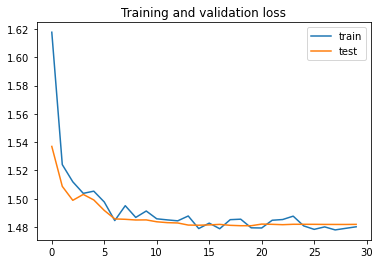

In [55]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

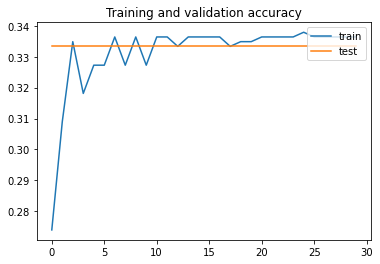

In [56]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

Train accuracy is fluctuating around 33 value. Test accuracy is settled around 33.

In [57]:
#hd_model = load_model(r"/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/Models/HYBRID_model.h5")
#hybrid_model = load_model(r"C:\Users\200488052\Downloads\ML\GL\Capstone\Jan-G4---NLP-Chatbot-main\finalized_Hybrid_model.h5")

y_pred = hybrid_model.predict([X_text_test_aug, X_cat_test_aug], verbose=0) # Multiclass
y_pred_index = np.argmax(y_pred,axis=1)
y_original = np.argmax(y_test, axis =1)

In [58]:
_,tr_accuracy_aug = hybrid_model.evaluate([X_text_train_aug, X_cat_train_aug],y_train) 
_,te_accuracy_aug = hybrid_model.evaluate([X_text_test_aug, X_cat_test_aug],y_test) 

F1_sre_aug= f1_score(y_original,y_pred_index, average='micro')
tr_accuracy_aug,te_accuracy_aug,F1_sre_aug

6/6 [==============================] - 1s 99ms/step - loss: 1.4818 - acc: 0.3333


(0.33637747168540955, 0.3333333432674408, 0.3333333333333333)

In [ ]:
result_df.loc[len(result_df.index)] = ['HYBRID_Model', tr_accuracy_aug, te_accuracy_aug,F1_sre_aug] 
result_df

In [ ]:
with open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/result_df.csv', "wb") as f:
  pickle.dump((result_df), f)

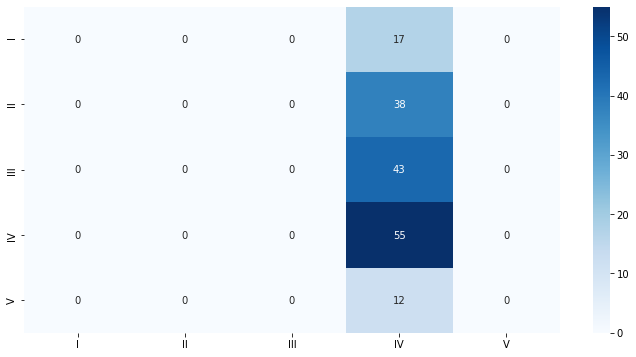

In [59]:
cm = confusion_matrix(y_original,y_pred_index)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label);

In [60]:
print(classification_report(y_original, y_pred_index))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        43
           3       0.33      1.00      0.50        55
           4       0.00      0.00      0.00        12

    accuracy                           0.33       165
   macro avg       0.07      0.20      0.10       165
weighted avg       0.11      0.33      0.17       165

